## 実験1-1：他モデルとの予測精度の比較：Excange Rate

### 入力データの取得

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seq_len = 96
pred_len = 192

df_true = pd.read_csv('dataset/exchange_rate/exchange_rate.csv')
df_last = df_true[-pred_len:]
df_csv = df_true[0:-pred_len]
df_csv.to_csv('dataset/exchange_rate/exchange_rate_pred.csv', index=False)

df2 = df_last.drop(df_last.columns[0], axis=1)
df2 = df2.reset_index(drop=True)
df2


,0,1,2,3,4,5,6,OT
0,0.759648,1.482701,0.782626,1.043705,0.152038,0.009450,0.747275,0.724113
1,0.748744,1.371930,0.772386,1.029458,0.151016,0.009786,0.741576,0.713318
2,0.748867,1.368045,0.769133,1.030721,0.151016,0.009782,0.739533,0.713318
3,0.748867,1.368045,0.769133,1.030721,0.151016,0.009782,0.739533,0.713318
4,0.733434,1.317592,0.762547,1.022411,0.150340,0.009812,0.733541,0.699399
...,...,...,...,...,...,...,...,...
187,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
188,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
189,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943
190,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.690942,0.692689


### 予測結果の格納


In [5]:
# ファイルを読み込んで表示
#Transformer
data = np.load("exp1_results/Exchange/Exchange_Transformer_prediction.npy")
df = pd.DataFrame(data)
df.columns = df2.columns
#Informer
data = np.load("exp1_results/Exchange/Exchange_Informer_prediction.npy")
df_info = pd.DataFrame(data)
df_info.columns = df2.columns
#Autoformer
data = np.load("exp1_results/Exchange/Exchange_Autoformer_prediction.npy")
df_auto = pd.DataFrame(data)
df_auto.columns = df2.columns
#FEDformer
data = np.load("exp1_results/Exchange/Exchange_FEDformer_prediction.npy")
df_fed = pd.DataFrame(data)
df_fed.columns = df2.columns
#Linear
data = np.load("exp1_results/Exchange/Exchange_Linear_prediction.npy")
df_linear = pd.DataFrame(data)
df_linear.columns = df2.columns
#DLinear
data = np.load("exp1_results/Exchange/Exchange_DLinear_prediction.npy")
df_dlinear = pd.DataFrame(data)
df_dlinear.columns = df2.columns

#Ns-Transformer
data = np.load("exp1_results/Exchange/Exchange_Ns_Transformer_prediction.npy")
df_ns = pd.DataFrame(data)
df_ns.columns = df2.columns

In [6]:
df_last_pred = df_true.iloc[-(pred_len+seq_len):-pred_len]
df_input = df_last_pred.drop(df_last_pred.columns[0], axis=1)
df_input = df_input.reset_index(drop=True)
df_input


,0,1,2,3,4,5,6,OT
0,0.760398,1.448153,0.768920,1.031683,0.154521,0.008963,0.735781,0.679648
1,0.760398,1.448153,0.768920,1.031683,0.154521,0.008963,0.735781,0.679648
2,0.758323,1.437401,0.764921,1.031140,0.154212,0.008952,0.735202,0.675060
3,0.761789,1.421000,0.765838,1.028463,0.154081,0.008925,0.734311,0.674514
4,0.753381,1.409245,0.757688,1.024223,0.153697,0.008873,0.731261,0.669860
...,...,...,...,...,...,...,...,...
91,0.739618,1.435802,0.775588,1.041960,0.151782,0.009604,0.741592,0.705442
92,0.739618,1.435750,0.775588,1.041960,0.151782,0.009604,0.741592,0.705069
93,0.745657,1.466544,0.780214,1.039825,0.152043,0.009614,0.744419,0.711187
94,0.746519,1.467233,0.780823,1.040843,0.151738,0.009550,0.745026,0.712911


In [7]:
#Ground Truth
df_concat_true = pd.concat([df_input, df2], ignore_index=True)
#Transformer
df_input.columns = df.columns
df_concat_pred = pd.concat([df_input, df], ignore_index=True)
#Informer
df_input.columns = df_info.columns
df_concat_pred_info = pd.concat([df_input, df_info], ignore_index=True)
#Autoformer
df_input.columns = df_auto.columns
df_concat_pred_auto = pd.concat([df_input, df_auto], ignore_index=True)
#FEDformer
df_input.columns = df_fed.columns
df_concat_pred_fed = pd.concat([df_input, df_fed], ignore_index=True)
#Linear
df_input.columns = df_linear.columns
df_concat_pred_linear = pd.concat([df_input, df_linear], ignore_index=True)
#DLinear
df_input.columns = df_dlinear.columns
df_concat_pred_dlinear = pd.concat([df_input, df_dlinear], ignore_index=True)
#Ns-Transformer
df_input.columns = df_ns.columns
df_concat_pred_ns = pd.concat([df_input, df_ns], ignore_index=True)

### Plot of results

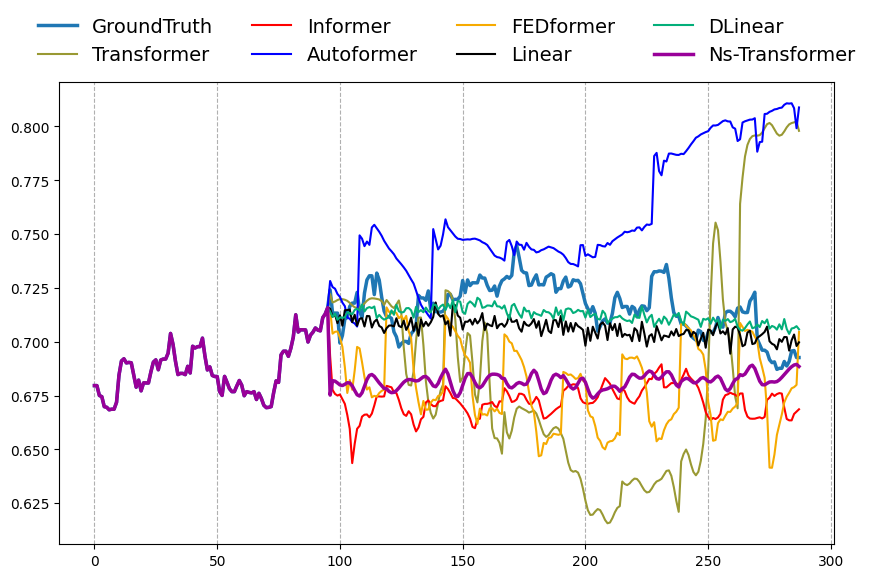

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

df_concat_true.plot(y='OT',ax=ax,linewidth=2.5)
df_concat_pred.plot(y='OT', ax=ax,color='#999933')
df_concat_pred_auto.plot(y='OT', ax=ax,color='r')
df_concat_pred_info.plot(y='OT', ax=ax,color='b')
df_concat_pred_fed.plot(y='OT', ax=ax,color='#F6AA00')
df_concat_pred_linear.plot(y='OT', ax=ax,color='k',)
df_concat_pred_dlinear.plot(y='OT', ax=ax,color='#03AF7A')
df_concat_pred_ns.plot(y='OT', ax=ax,color='#990099',linewidth=2.5)
# colors = ['r', '#03AF7A', 'b', 'c', '#990099', '#F6AA00', '#999933']  # 異なる色の種類
ax.legend(['GroundTruth', 'Transformer', 'Informer', 'Autoformer', 'FEDformer', 'Linear', 'DLinear', 'Ns-Transformer'], loc='lower center', bbox_to_anchor=(0.5, 1), frameon=False, fancybox=False, shadow=False, ncol=4,fontsize=14)

ax.grid(axis='x', linestyle='--')

plt.savefig('exp1_results/fig/exp1_Exchange_prediction.png')
# Set the y-axis range
#plt.ylim(0.5, 1.0)

plt.show()